In [1]:
import pandas as pd
import plotly.express as px
from utils import display_pdf

### Case

- Sheriff has 180 km/hour car.
- Bank robber has 150 km/hour car and five-minute head start.
- How long does it take the sheriff to catch the robber?
- What distance will they have traveled at that point?
- (For simplicity, let's ignore acceleration, traffic, etc.)


In [103]:
sheriff_speed = 180 / 60
robber_speed = 150 / 60

# Starting point
sheriff_start = (0, 5)
robber_start = (robber_speed * 5, 5)

sheriff = sheriff_start
robber = robber_start

# Mulai kejar-kejaran
while True:
    sheriff = (sheriff[0] + sheriff_speed, sheriff[1] + 1)
    robber = (robber[0] + robber_speed, robber[1] + 1)

    if sheriff[0] == robber[0]:
        # Final point
        sheriff_end = sheriff
        robber_end = robber

        # Add more to make lines in chart to be crossing each other
        frequency = 10

        sheriff = (
            sheriff[0] + sheriff_speed * frequency,
            sheriff[1] + 1 * frequency
        )

        robber = (
            robber[0] + robber_speed * frequency,
            robber[1] + 1 * frequency
        )

        break

In [162]:
range_x = (-100, 100)
range_y = (-40, 40)

df = pd.DataFrame({
    'Distance (km)': [
        i for i in range(range_x[0], range_x[1] + 1, 10)
    ] + [
        0 for i in range(range_y[0], range_y[1] + 1, 10)
    ] + [
        0, sheriff_start[0], sheriff_end[0], sheriff[0]
    ] + [
        0, robber_start[0], robber_end[0], robber[0]
    ],
    'Time (minute)': [
        0 for i in range(range_x[0], range_x[1] + 1, 10)
    ] + [
        i for i in range(range_y[0], range_y[1] + 1, 10)
    ] + [
        0, sheriff_start[1], sheriff_end[1], sheriff[1]
    ] + [
        0, robber_start[1], robber_end[1], robber[1]
    ],
    'Line': [
        'Distance (km)' for i in range(range_x[0], range_x[1] + 1, 10)
    ] + [
        'Time (minute)' for i in range(range_y[0], range_y[1] + 1, 10)
    ] + [
        'Sheriff' for i in range(4)
    ] + [
        'Robber' for i in range(4)
    ]
})

fig = px.line(
    df, 'Distance (km)', 'Time (minute)',
    color='Line',
    width=1000, height=600,
    range_x=range_x, range_y=range_y,
    markers=True
)

print(f'Sheriff Start: {sheriff_start}')
print(f'Robber Start : {robber_start}')

print(f'\nSheriff End  : {sheriff_end}')
print(f'Robber End   : {robber_end}')

fig

Sheriff Start: (0, 5)
Robber Start : (12.5, 5)

Sheriff End  : (75.0, 30)
Robber End   : (75.0, 30)


### Alternatively, problem can be solved algebraically


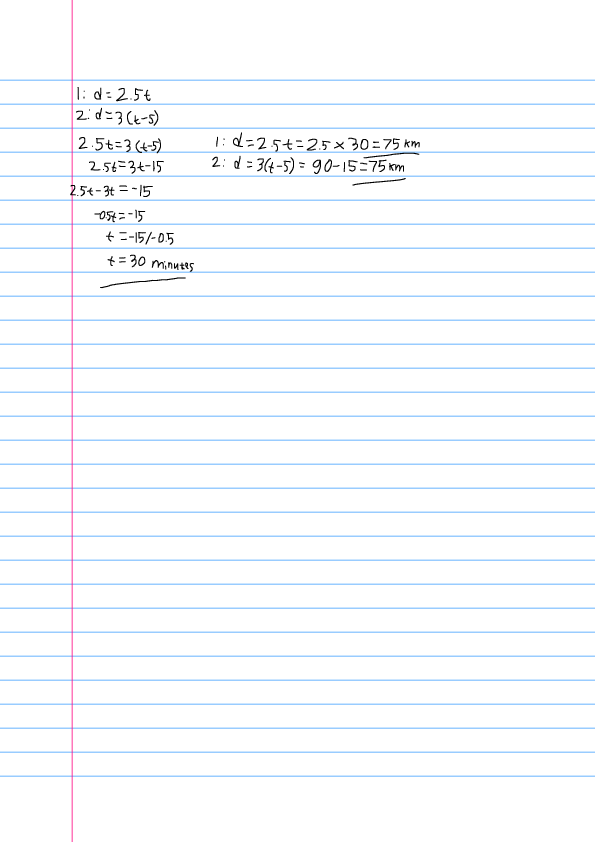

In [2]:
display_pdf('../assets/sheriff_robber.pdf')